# Exploratory Data Analysis

In [10]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [11]:
df = pd.read_csv("../data/raw/Housing.csv")

df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [12]:
print(f'Dataset columns: \n{df.columns}\n')

print("Null values:")
df.isnull().any().astype(int)

df.drop_duplicates()

print(f'Pricing mean: ${df['price'].mean().astype(float)}')
print(f'Area mean: {df['area'].mean()}')
print(f'Parking mean: {df['parking'].mean()}')

df['furnishingstatus'].unique()

Dataset columns: 
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

Null values:
Pricing mean: $4766729.247706422
Area mean: 5150.54128440367
Parking mean: 0.6935779816513762


array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

Houses above average price: 222
Houses below average price: 323
Houses in average price: 0


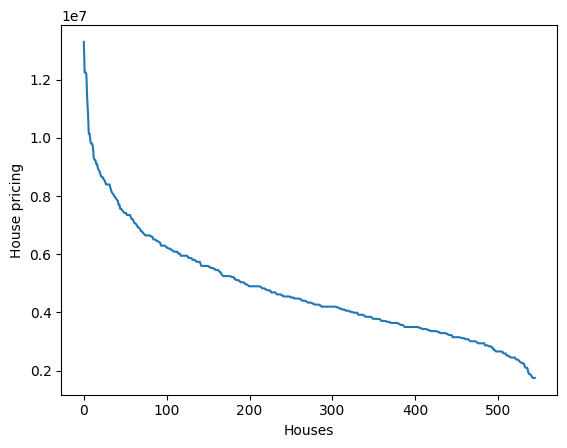

In [13]:
avarage_price = df['price'].mean()

above_average_houses = df[df['price'] > avarage_price]
below_average_houses = df[df['price'] < avarage_price]
average_houses = df[df['price'] == avarage_price]

print(f'Houses above average price: {len(above_average_houses)}')
print(f'Houses below average price: {len(below_average_houses)}')
print(f'Houses in average price: {len(average_houses)}')

plt.plot(df['price'])
plt.ylabel('House pricing')
plt.xlabel('Houses')
plt.show()

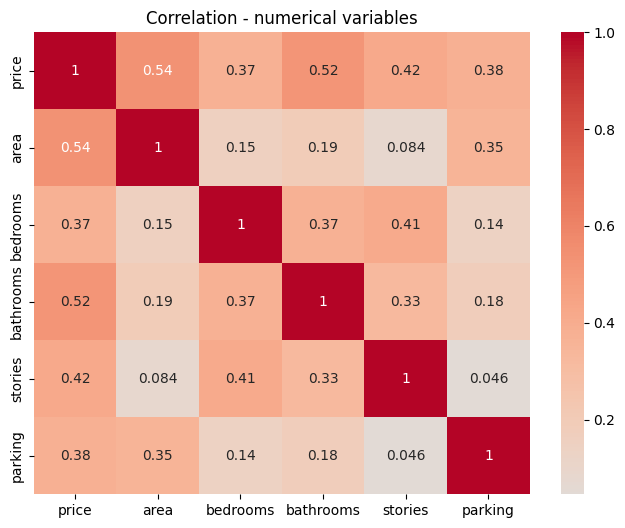

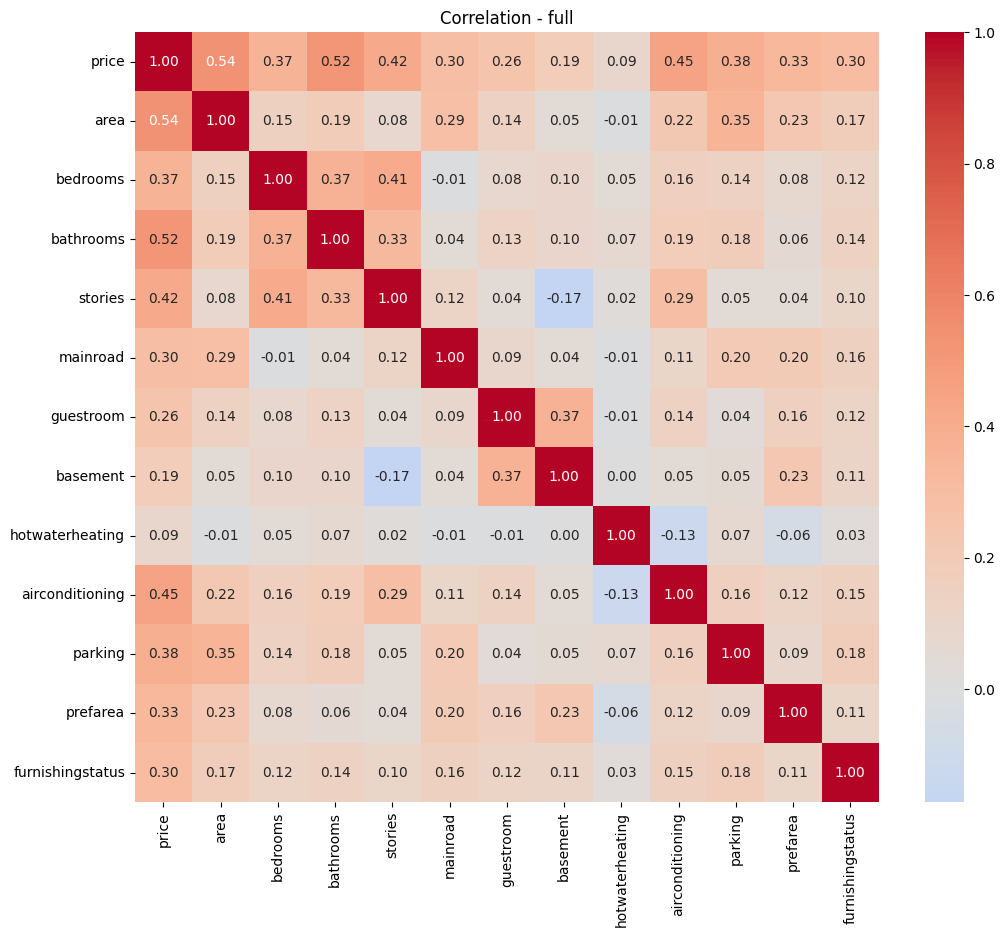

<Figure size 640x480 with 0 Axes>

In [14]:
numeric_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
numeric_corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sb.heatmap(numeric_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation - numerical variables')
plt.show()

df_encoded = df.copy()

binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df_encoded[col] = df_encoded[col].map({'yes': 1, 'no': 0})

df_encoded['furnishingstatus'] = df_encoded['furnishingstatus'].map({
    'furnished': 2, 
    'semi-furnished': 1, 
    'unfurnished': 0
})

full_corr = df_encoded.corr()

plt.figure(figsize=(12,10))
sb.heatmap(full_corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation - full')
plt.show()
plt.savefig('./graphs/correlation_map.png', dpi=300, bbox_inches='tight')


In [15]:
df_encoded = pd.get_dummies(df, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], drop_first=True)

df_encoded

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,2,furnished,True,False,False,False,True,True
1,12250000,8960,4,4,4,3,furnished,True,False,False,False,True,False
2,12250000,9960,3,2,2,2,semi-furnished,True,False,True,False,False,True
3,12215000,7500,4,2,2,3,furnished,True,False,True,False,True,True
4,11410000,7420,4,1,2,2,furnished,True,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,unfurnished,True,False,True,False,False,False
541,1767150,2400,3,1,1,0,semi-furnished,False,False,False,False,False,False
542,1750000,3620,2,1,1,0,unfurnished,True,False,False,False,False,False
543,1750000,2910,3,1,1,0,furnished,False,False,False,False,False,False
